# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instance than majority class.SMOTE involves generating synthetic instance of minority class by interploting between existing instances 

sklearn (scikit-learn)

1.Preprocessing data (scaling, encoding, splitting into train/test)

2.Handling imbalanced datasets (like your case, using resample)

3.Training models (logistic regression, decision trees, random forests, SVMs, etc.)

4.Evaluating models (accuracy, precision, recall, ROC, etc.)

In [1]:
from sklearn.datasets import make_classification

In [5]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [6]:
import pandas as pd 
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

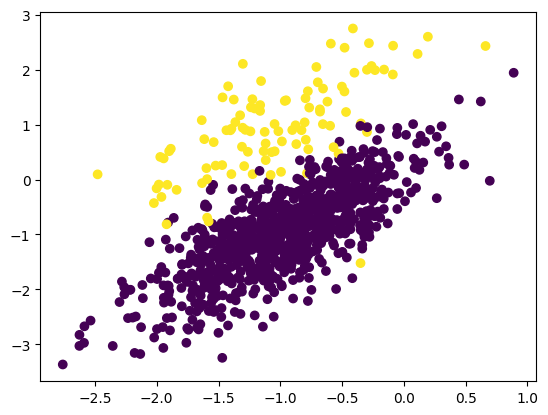

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])


In [10]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
## transform the datast 

oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [15]:
x.shape

(1800, 2)

In [16]:
y.shape

(1800,)

In [20]:
len(y [y==0])

900

In [21]:
len(y [y==1])

900

In [22]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

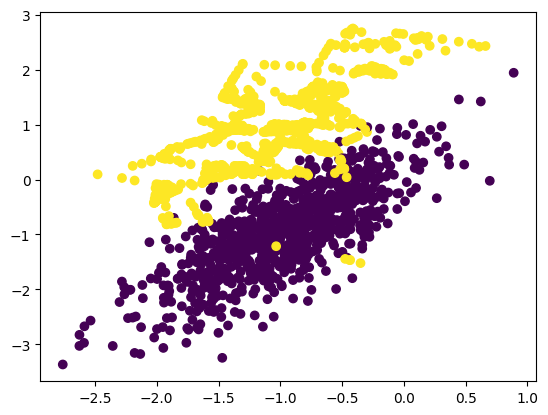

In [23]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

# Examples:--

In [25]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
import numpy as np

# Create toy dataset
X = pd.DataFrame({
    'feature_1': [1, 2, 3, 10, 11, 12],  # minority are smaller numbers
    'feature_2': [1, 1, 2, 10, 11, 12]
})
y = [1, 1, 1, 0, 0, 0]   # 3 minority (1), 3 majority (0)

print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({1: 3, 0: 3})
After SMOTE: Counter({1: 3, 0: 3})
